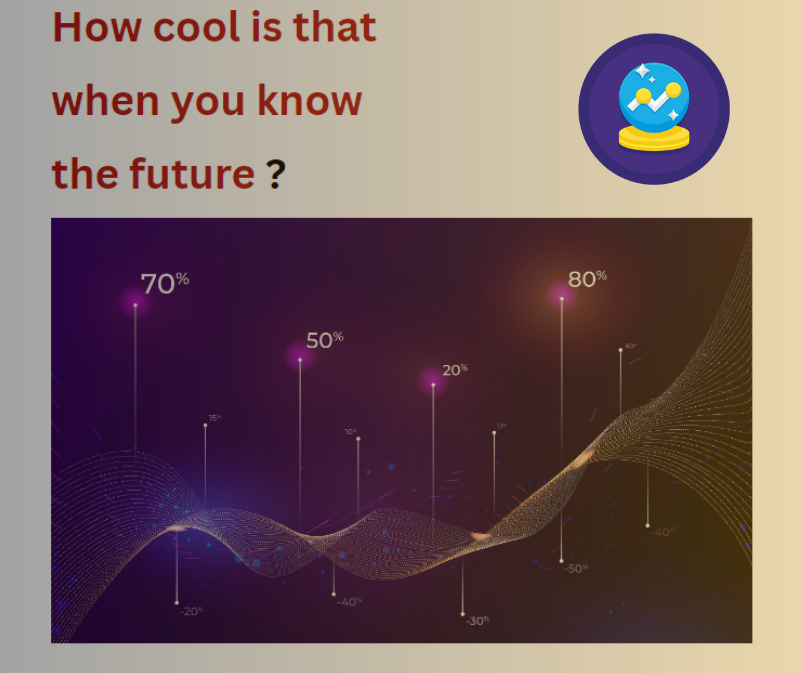

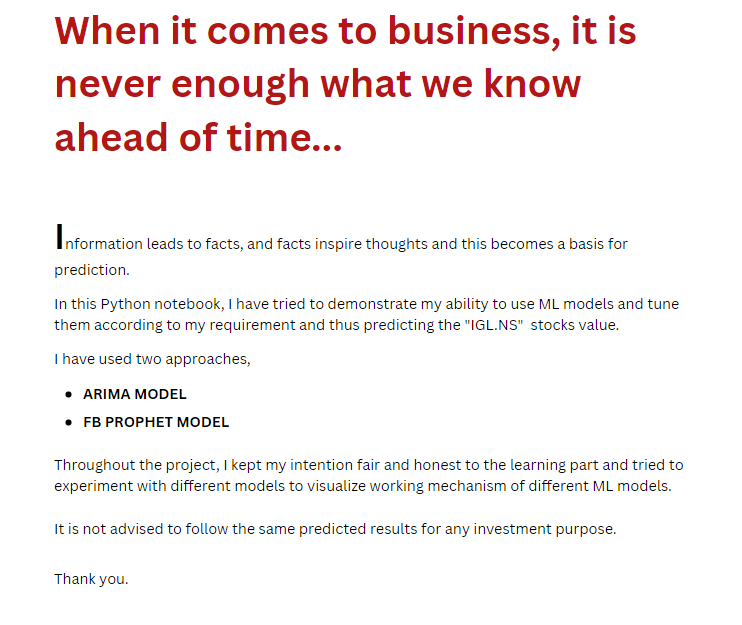

## <font color='#CA2907'>**Preparing Data**</font>

####**Importing required libraries**

In [81]:
import yfinance as yf
import pandas as pd
import datetime as dt

## <font color='#CA2907'>**I am using data from year 2016 to current date**</font>

>**Reason being, stock do not seem much active prior to 2016 and there is a sudden change in following years after 2016**

In [82]:
# Igl stocks prices
ig_ticker = yf.Ticker('IGL.NS')
igl_data = ig_ticker.history(start = '2016-01-01')
igl_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-01 00:00:00+05:30,97.972979,98.028018,96.321746,96.679512,1930200,0.0,0.0
2016-01-04 00:00:00+05:30,95.973140,97.138172,95.046615,95.266777,2729910,0.0,0.0
2016-01-05 00:00:00+05:30,95.587866,105.917229,95.431918,102.091881,13864160,0.0,0.0
2016-01-06 00:00:00+05:30,101.899227,104.853095,99.670066,104.155907,18552275,0.0,0.0
2016-01-07 00:00:00+05:30,102.192776,107.329934,101.807491,102.789055,14756335,0.0,0.0


### <font color='#CA2907'>**Creating Pandas Dataframe**</font>


In [83]:
igl= pd.DataFrame(igl_data['Close'])
igl.head()

,Close
Date,
2016-01-01 00:00:00+05:30,96.679512
2016-01-04 00:00:00+05:30,95.266777
2016-01-05 00:00:00+05:30,102.091881
2016-01-06 00:00:00+05:30,104.155907
2016-01-07 00:00:00+05:30,102.789055


### <font color='#CA2907'>**Date index contains time information as well, I have reset the index to make Date as column and defined the required format for the date**</font>


In [84]:
igl.reset_index(inplace=True)
igl['Date']= igl['Date'].dt.strftime('%m/%d/%Y')
igl.head()

,Date,Close
0,01/01/2016,96.679512
1,01/04/2016,95.266777
2,01/05/2016,102.091881
3,01/06/2016,104.155907
4,01/07/2016,102.789055


### <font color='#CA2907'>**Resetting Date as index once again**</font>


In [85]:
igl.set_index('Date',inplace = True)
igl.head()

,Close
Date,
01/01/2016,96.679512
01/04/2016,95.266777
01/05/2016,102.091881
01/06/2016,104.155907
01/07/2016,102.789055


### <font color='#CA2907'>**Exploring Data**</font>


In [86]:
igl.describe()

,Close
count,1817.000000
mean,321.996494
std,121.554968
min,89.790207
25%,239.511459
50%,316.117767
75%,419.364807
max,563.015564


# <font color='#CA2907'>**ARIMA MODEL**</font>

###**Autoregressive Integrated Moving Average**




### <font color='#CA2907'>**Checking Stationarity of the Time Series**</font>

>**Arima Model works only with the stationary time series**


>**Using AD Fuller Test and hypothesis testing to carry out the Stationarity Test**

In [87]:
# Checking stationary of the series
from statsmodels.tsa.stattools import adfuller
result = adfuller(igl.Close.dropna())
print(f"ADF statistics : {result[0]}")
print(f"p- value : {result[1]}")

ADF statistics : -1.4504825923964455
p- value : 0.557849404779166


**As the** <font color='#CA2907'> **p-Value** </font> **is greater than 0.05, failed to reject null, the time series is not stationary**


### <font color='#CA2907'>**Ploting ACF plot to check the behaviour of Close value**</font>


In [88]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

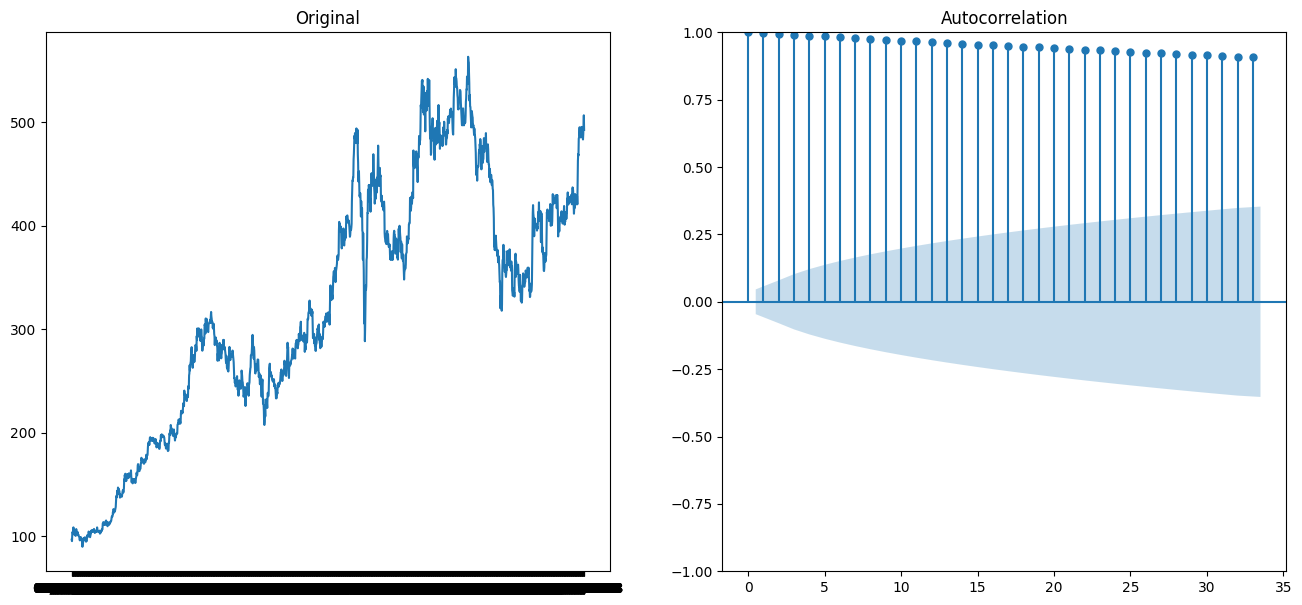

In [89]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(16,7))

ax1.set_title("Original")
ax1.plot(igl['Close'])
plot_acf(igl['Close'], ax2);

### <font color='#CA2907'>**Using differencing to make the time series stationary**</font>


**Differencing means subtracting a record with its immediate successor record.**

> Pandas diff() function will be used.


### <font color='#CA2907'>**Plotting ACF Plot to estimate d value**</font>

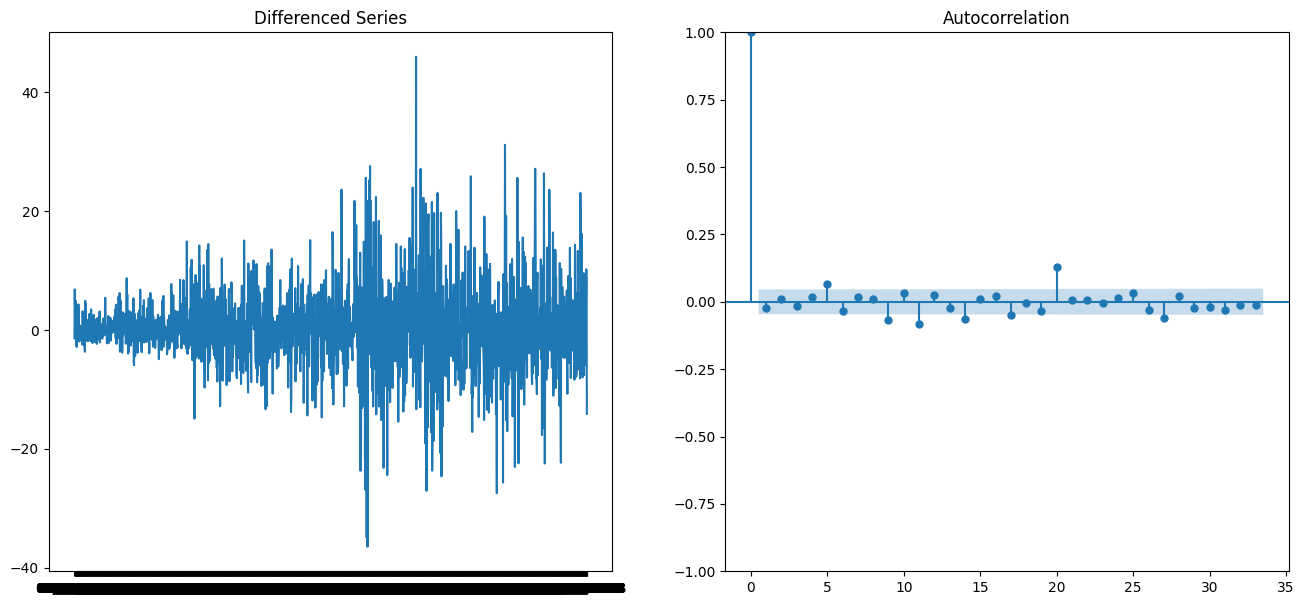

In [90]:
igl_first_diff= igl.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(16,7))
ax1.set_title('Differenced Series')
ax1.plot(igl_first_diff)
plot_acf(igl_first_diff,ax2);

**The differenced time series seems to be vibrating with on the same axis**



### <font color='#CA2907'>**Using AD Fuller Test again to check Stationarity**</font>


In [91]:
# Checking result from adfuller test to
# h0= series is not stationary
#h1= series is stationary
c_limit = 0.05
result_diff = adfuller(igl_first_diff.dropna())
#print(f"ADF statistics : {result_diff[0]}")
#print(f"p- value : {result_diff[1]}")
p_value = result_diff[1]
if p_value > c_limit:
  print(f'Failed to reject Null Hypothesis, series is not stationary with p_value of {p_value}')
else:
  print(f'reject Null Hypothesis, series is stationary with p_value {p_value}')


reject Null Hypothesis, series is stationary with p_value 3.6085306350896624e-16


### <font color='#CA2907'>**Small p-Value provide strong evidence against null hypothesis thus we can assume the series is stationary**</font>


## <font color='#CA2907'>**Getting PACF Plot required to estimate p value for the Arima model**</font>

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


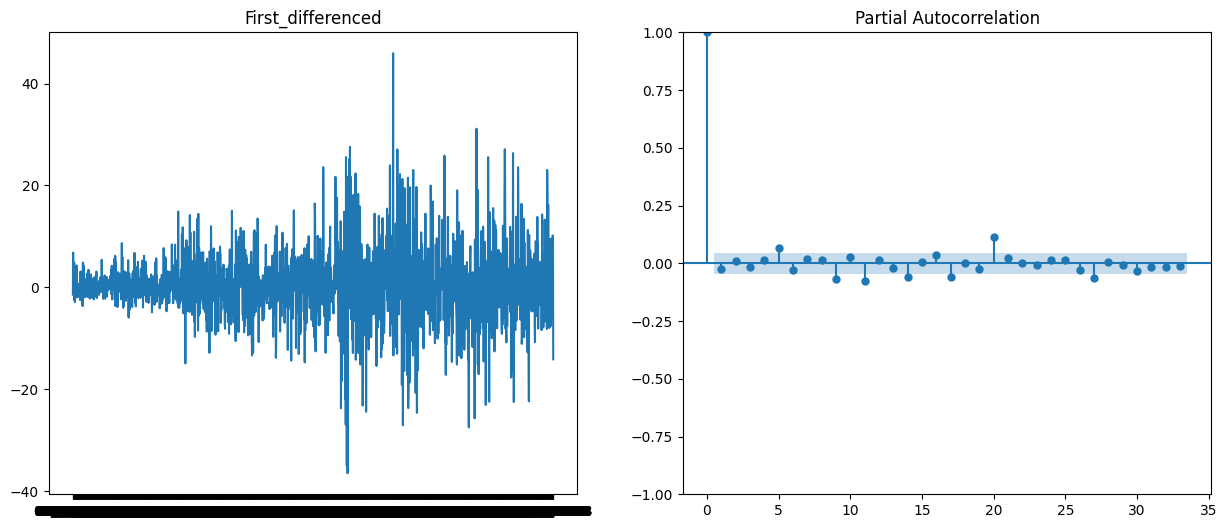

In [92]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,6))
ax1.set_title('First_differenced')
ax1.plot(igl_first_diff)
ax2.set_ylim(0,1)
plot_pacf(igl_first_diff.dropna(), ax2);

### <font color='#CA2907'>**With ACF and PACF we have estimated best possible values for p and q variables used in ARIMA Model**</font>

> **p= 5**

> **d= 1 (differecing occured once)**

> **q= 5**

## <font color='#CA2907'>**Importing ARIMA model**</font>

In [93]:
from statsmodels.tsa.arima.model import ARIMA

### <font color='#CA2907'>**Fitting model with required time-series and p,d q values**</font>

In [94]:
model = ARIMA(igl.Close.dropna(), order= (5,1,6))
result= model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [95]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1817
Model:                 ARIMA(5, 1, 6)   Log Likelihood               -6073.819
Date:                Thu, 11 May 2023   AIC                          12171.638
Time:                        12:55:09   BIC                          12237.691
Sample:                             0   HQIC                         12196.010
                               - 1817                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7049      0.055    -12.782      0.000      -0.813      -0.597
ar.L2          1.1216      0.078     14.417      0.000       0.969       1.274
ar.L3          1.1746      0.051     22.972      0.000       1.074       1.275
ar.L4         -0.5615      0.069     -8.085      0.000      -0.698      -0.425
ar.L5         -0.8654      0.050    -17.341      0.000      -0.963      -0.768
ma.L1          0.6961      0.060     11.536      0.000       0.578       0.814
ma.L2         -1.0739      0.076    -14.074      0.000      -1.223      -0.924
ma.L3         -1.1302      0.049    -23.137      0.000      -1.226      -1.034
ma.L4          0.5367      0.067      8.050      0.000       0.406       0.667
ma.L5          0.8634      0.050     17.123      0.000       0.765       0.962
ma.L6          0.0281      0.021      1.311      0.190      -0.014       0.070
sigma2        47.9895      1.000     48.011      0.000      46.030      49.949
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1140.14
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               5.88   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**According to our p,d,q values, Model calculates the iterations**

### <font color='#CA2907'>**Using predict function to predict future values starting from index 400 to 600**</font>

**This is done to see how well the model fit with the original values while asking it to predict for future.**

In [96]:
result_predict = result.predict(start= 1700, end =1850, dynamic =  False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


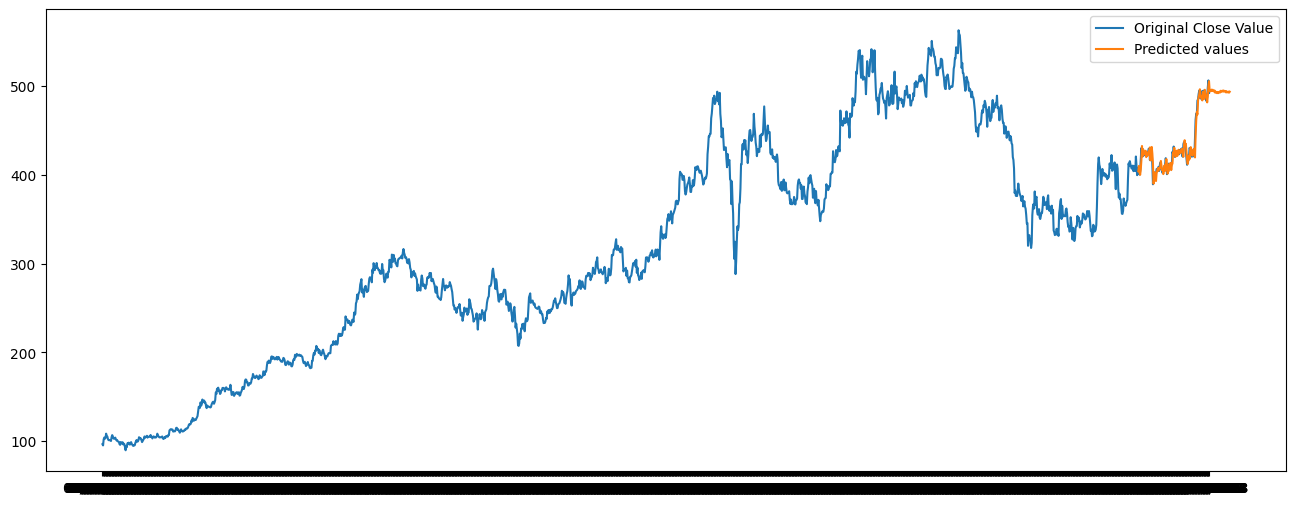

In [97]:
plt.figure(figsize=(16,6))
plt.plot(igl.Close, label ='Original Close Value')
plt.plot(result_predict, label = 'Predicted values')
plt.legend()
plt.show()

#### <font color='#CA2907'>**The closeness between both the line grapgh shows how well the forecasted values fit with the original values.**</font>

# <font color='blue'>**---------------------------------------------------------------------------------------------------**</font>

# <font color='#CA2907'>**Using another ML model FB Prophet to predict future stock values**

**FB Prophet is majorly known for its ability to work with high effectiveness for Univariate Analysis**


### <font color='#CA2907'>**Installing and Importing FB Prophet**</font>

In [98]:
#!pip install prophet

In [99]:
from prophet import Prophet

In [100]:
igl_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-01 00:00:00+05:30,97.972979,98.028018,96.321746,96.679512,1930200,0.0,0.0
2016-01-04 00:00:00+05:30,95.973140,97.138172,95.046615,95.266777,2729910,0.0,0.0
2016-01-05 00:00:00+05:30,95.587866,105.917229,95.431918,102.091881,13864160,0.0,0.0
2016-01-06 00:00:00+05:30,101.899227,104.853095,99.670066,104.155907,18552275,0.0,0.0
2016-01-07 00:00:00+05:30,102.192776,107.329934,101.807491,102.789055,14756335,0.0,0.0


### <font color='#CA2907'>**Choosing additional High Column with Close so that datatype should remain as DataFrame, later High column will be dropped**</font>

In [101]:
igl_forcast= igl_data[['High','Close']]
igl_forcast.head()

,High,Close
Date,,
2016-01-01 00:00:00+05:30,98.028018,96.679512
2016-01-04 00:00:00+05:30,97.138172,95.266777
2016-01-05 00:00:00+05:30,105.917229,102.091881
2016-01-06 00:00:00+05:30,104.853095,104.155907
2016-01-07 00:00:00+05:30,107.329934,102.789055


### <font color='#CA2907'>**Preparing data as per the FB Prophet model**</font>

>**Date must be a Column with name "ds".**

>**Date should not have any timezone information attached.**

>**High Column will be dropped as it is not required.**

>**Close Column will be renamed to y.**

### <font color='#CA2907'>**Reseting Index to set date as column**</font>

In [102]:
igl_forcast.reset_index(inplace=True)
igl_forcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype                       
---  ------  --------------  -----                       
 0   Date    1817 non-null   datetime64[ns, Asia/Kolkata]
 1   High    1817 non-null   float64                     
 2   Close   1817 non-null   float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(2)
memory usage: 42.7 KB


### <font color='#CA2907'>**Dropping High Column**</font>

In [103]:
igl_forcast.drop('High', axis=1, inplace= True)

<ipython-input-103-5f2ea8f81d29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igl_forcast.drop('High', axis=1, inplace= True)


### <font color='#CA2907'>**Renamming Columns according to Prophet Model**</font>

In [104]:
igl_forcast.rename(columns= {'Date':'ds','Close':'y'}, inplace= True)
igl_forcast.head()

<ipython-input-104-eef889fe8f77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igl_forcast.rename(columns= {'Date':'ds','Close':'y'}, inplace= True)


,ds,y
0,2016-01-01 00:00:00+05:30,96.679512
1,2016-01-04 00:00:00+05:30,95.266777
2,2016-01-05 00:00:00+05:30,102.091881
3,2016-01-06 00:00:00+05:30,104.155907
4,2016-01-07 00:00:00+05:30,102.789055


### <font color='#CA2907'>**Removing local time zome information from Date**</font>

In [105]:
igl_forcast['ds'] = igl_forcast['ds'].dt.tz_localize(None)

<ipython-input-105-bc356e3558a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igl_forcast['ds'] = igl_forcast['ds'].dt.tz_localize(None)


### <font color='#CA2907'>**Result Dataframe :**</font>

In [106]:
igl_forcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1817 non-null   datetime64[ns]
 1   y       1817 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.5 KB


### <font color='#CA2907'>**Creating Model**</font>

In [109]:
model= Prophet(weekly_seasonality= True)

### <font color='#CA2907'>**Fitting into the Model**</font>

In [110]:
model.fit(igl_forcast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4v5svnp7/8e1grq_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4v5svnp7/_wnzn9t3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2523', 'data', 'file=/tmp/tmp4v5svnp7/8e1grq_m.json', 'init=/tmp/tmp4v5svnp7/_wnzn9t3.json', 'output', 'file=/tmp/tmp4v5svnp7/prophet_modelnuz8nsw_/prophet_model-20230511130125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:01:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:01:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### <font color='#CA2907'>**Making Future Predictions for 60 periods**</font>

In [117]:
future = model.make_future_dataframe(periods=60)
future.tail()

,ds
1872,2023-07-06
1873,2023-07-07
1874,2023-07-08
1875,2023-07-09
1876,2023-07-10


### <font color='#CA2907'>**Predicting future values**</font>

In [118]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1872,2023-07-06,380.468333,341.957868,416.056690
1873,2023-07-07,378.679432,342.787907,414.428558
1874,2023-07-08,344.790333,310.179059,383.539559
1875,2023-07-09,377.544436,336.724927,416.499094
1876,2023-07-10,379.176904,342.612909,417.393994


In [119]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          1877 non-null   datetime64[ns]
 1   trend                       1877 non-null   float64       
 2   yhat_lower                  1877 non-null   float64       
 3   yhat_upper                  1877 non-null   float64       
 4   trend_lower                 1877 non-null   float64       
 5   trend_upper                 1877 non-null   float64       
 6   additive_terms              1877 non-null   float64       
 7   additive_terms_lower        1877 non-null   float64       
 8   additive_terms_upper        1877 non-null   float64       
 9   weekly                      1877 non-null   float64       
 10  weekly_lower                1877 non-null   float64       
 11  weekly_upper                1877 non-null   float64     

### <font color='#CA2907'>**DataFrame Forcast have fiollowing columns which contain all information of predicted values**</font>

**Columns to be noticed**

> **ds - Date**

> **yhat - Predicted Values**

> **yhat_lower - Lower bound of predicted values**

> **yhat_upper - Upper bound of predicted values**

### <font color='#CA2907'>**Plotting forcasted values with Upper and Lower bounds**</font>

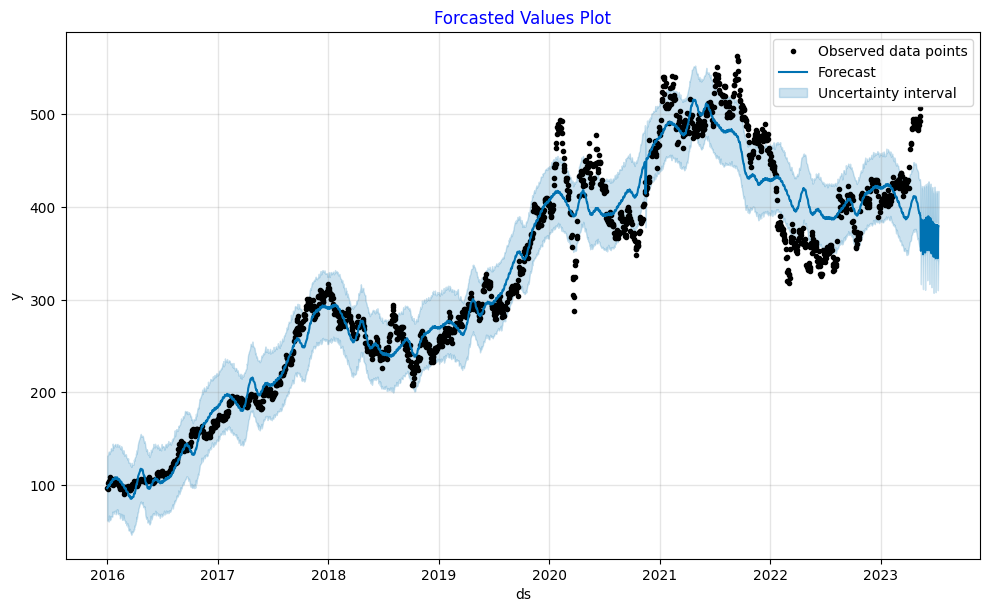

In [120]:
fig1 = model.plot(forecast)
plt.title('Forcasted Values Plot', color='blue')
plt.legend()

### <font color='#CA2907'>**Plotting Components of the predictions**</font>

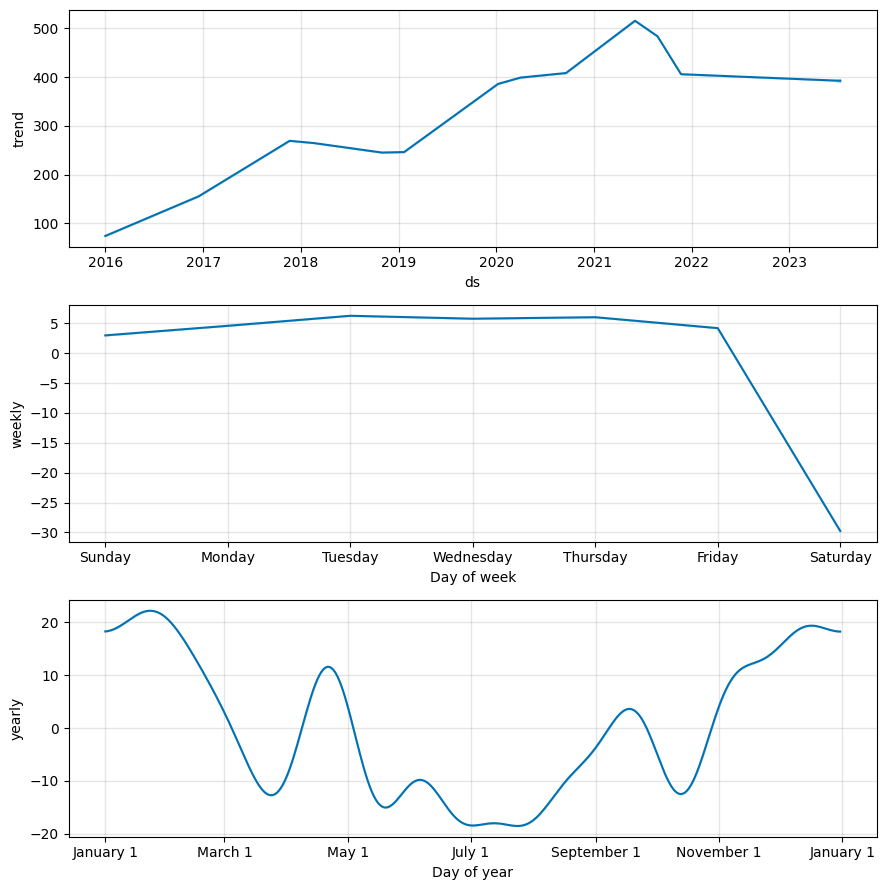

In [124]:
fig2 = model.plot_components(forecast)

### <font color='#CA2907'>**Plotting Forecasted Values with Original Close Values**</font>

In [121]:
from matplotlib import pyplot as plt

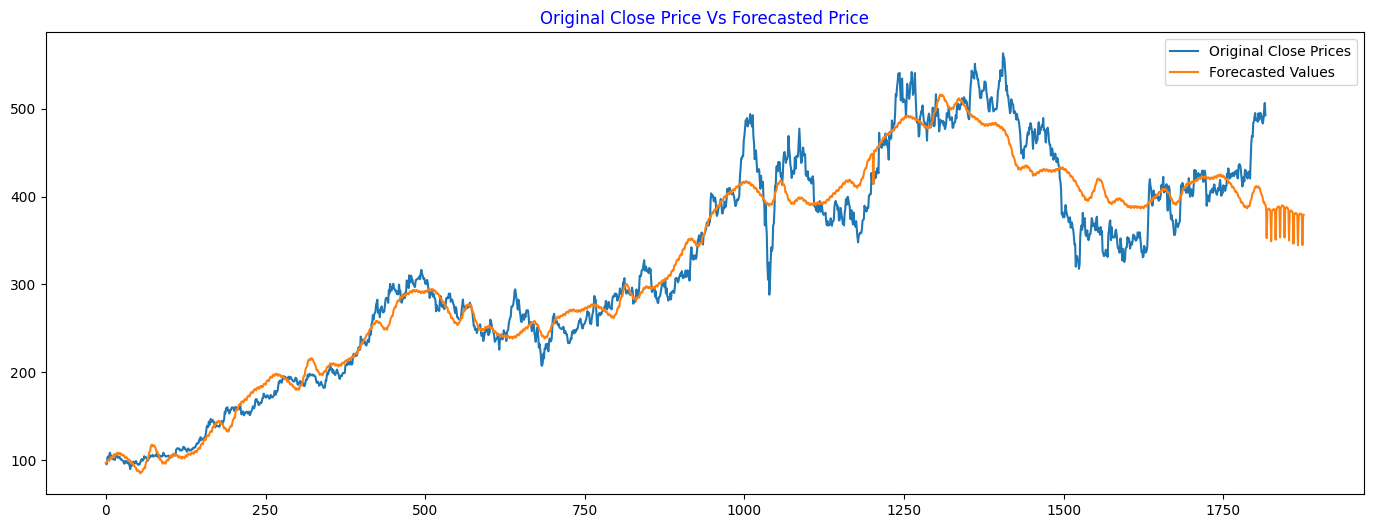

In [122]:
plt.figure(figsize=(17,6))
plt.plot(igl_forcast['y'], label ='Original Close Prices')
plt.plot(forecast['yhat'], label='Forecasted Values')
plt.title('Original Close Price Vs Forecasted Price', color ='blue')
plt.legend()
plt.show()

# <font color='blue'>**Conclusion**</font>




> **The Components graph provides a handsome information based on stock trend, weekly and Yearly analysis**

> **Yearly trend reflects highly optimized variation of stock price which is very close to actual trend**

> **According to this trend,**  <font color='#CA2907'> **June-July** </font> **is best to invest money in the stock**

**The close relation between both the line plots highlights the fact that how well the model predicted fot IGL.NS stock.**

> **Forecasted value seems to be highly responsive to sudden changes and many times changed the values even before change encountered in original values**

>**This could be use as a warning sign**



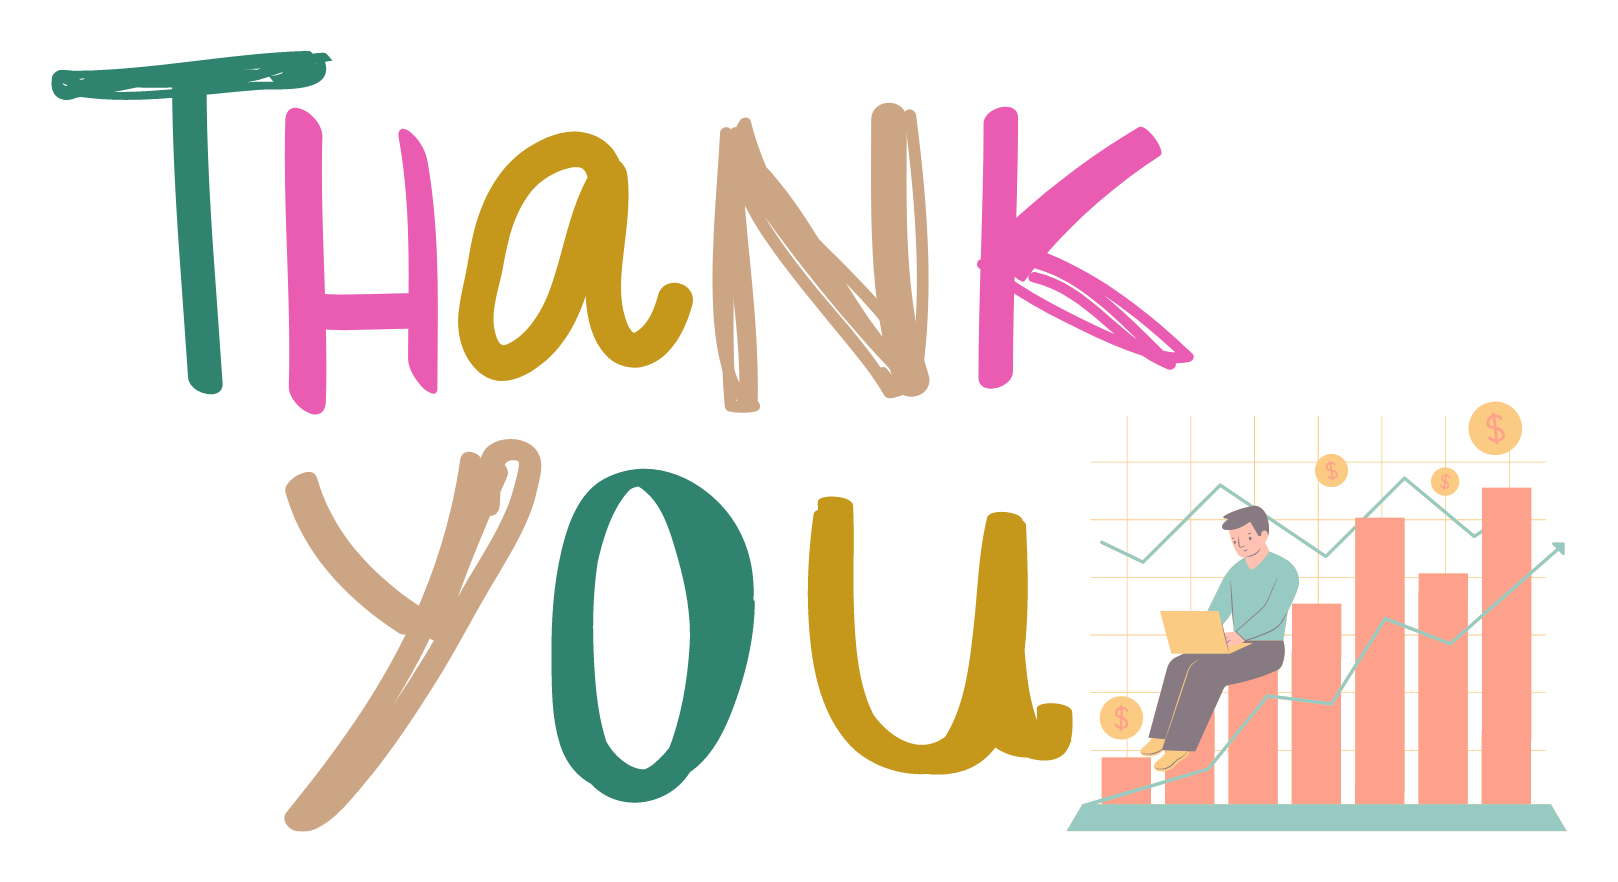

**I undertook this technical stock analysis to get an experience of what an investment analyst/financial analyst would do in their daily tasks. Analyzing stocks offers a deep learning of connecting dots with facts and observing them happening in real-world events.**


**During the project, I mostly enjoyed observing the behavior of the stock related to specific months/years. I tried my best to bring out even a minute detail that I found interesting and worth sharing. I believe a person starting his investment journey with stocks will find this highly useful related to patterns and parameters to look upon before making a judgment.**


**Also, this project is only for education purpose and do not guarantee a profit in investment and it is not advised to depend on the forecast ML model made. There are other parameters that should be ingested before investing such as research about company values, their decision-makers, market sentiment, real-world event, etc.** 


**If you are at this point and have any feedback for my work, please use my Github username <font color='#CA2907'>**sou7500**</font> to find me.**

**Thank you 
Sourabh Kumar**